In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [52]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize individual models
rf_model = DecisionTreeClassifier(max_depth=1)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# Train the individual models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions with each model
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

In [66]:
ensemble_preds = np.array([rf_preds, gb_preds, xgb_preds])
ensemble_preds = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=ensemble_preds)

# Evaluate the individual and ensemble models
print("Decision Tree Accuracy:", accuracy_score(y_test, rf_preds))
# print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_preds))

Decision Tree Accuracy: 0.8947368421052632
XGBoost Accuracy: 0.956140350877193
Ensemble Accuracy: 0.956140350877193


In [67]:
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [68]:
base_classifier = DecisionTreeClassifier(max_depth=1)
bagging = BaggingClassifier(base_classifier, n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging.predict(X_test)

# Evaluate Bagging model
bagging_metrics = evaluate_model(y_test, y_pred_bagging)

In [69]:
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0, random_state=42)
adaboost_classifier.fit(X_train, y_train)

d:\College Notes\Third Year\ML\base\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [70]:
y_pred = adaboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158



Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix for Ensemble Model:
[[40  3]
 [ 2 69]]


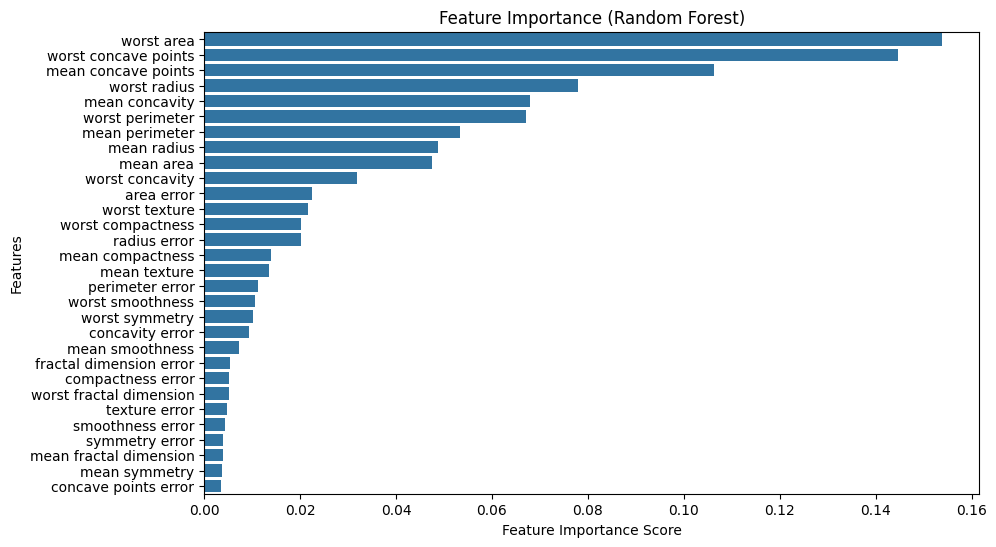

In [39]:
print("\nClassification Report for Ensemble Model:")
print(classification_report(y_test, ensemble_preds))

print("\nConfusion Matrix for Ensemble Model:")
print(confusion_matrix(y_test, ensemble_preds))

feature_importances = pd.Series(rf_model.feature_importances_, index=data.feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance (Random Forest)")
plt.show()